# NEURONAL MULTILAYER

In [ ]:
%tensorflow_version 2.0 

In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
from tensorflow.keras.regularizers import L1L2
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime

**FUNCTIONS**

In [2]:
def getDataset():

  (train_images, train_label), (test_images, test_label) = cifar10.load_data()

  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                 'dog', 'frog', 'horse', 'ship', 'truck']

  return class_names, train_images, train_label, test_images, test_label

In [3]:
def history_model(history, modelName):
  
    plt.subplot(121)
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title(modelName + ' Accuracy')
    plt.ylabel('sparse_categorical_accuracy')
    plt.xlabel('epochs')
    plt.ylim([0.0,1.0])
    plt.legend(['train_accuracy', 'val_sparse_categorical_accuracy'])

    plt.subplot(122)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(modelName + ' Loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.ylim([0.0,3.0])
    plt.legend(['train_loss', 'val_loss'])

    plt.show()

In [4]:
def confusion(class_names, test_label, predict_one_hot):

    predict1D = []
    for pred in predict_one_hot:
      predict1D.append(pred.argmax())
    predict1D = np.array(predict1D)
    
    cm = tf.math.confusion_matrix(labels=test_label, predictions=predict1D, num_classes=len(class_names))
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, range(len(class_names)))
    plt.yticks(tick_marks, range(len(class_names)))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()

In [5]:
def plot_sample(class_names, train_images, train_label, augm=None):
    
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5

    for i in range(1, columns * rows +1):
        
        if augm is not None:
          img = augm.random_transform(train_images[i])
        else:
          img = train_images[i]

        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        
    plt.show()

In [6]:
def describe_dataset(dataset):

  for i in range(0, len(dataset[0])):

    print("Class ", i, ":", dataset[0][i])
    countClassInTrain = 0

    for j in range(0, dataset[1].shape[0]):

      if i == dataset[2][j]:

        if countClassInTrain == 0:
          plt.imshow(dataset[1][j])
          plt.show()
        countClassInTrain += 1

    print(dataset[0][i], " in train data: ", countClassInTrain, "/", dataset[1].shape[0])
    countClassInTest = 0

    for k in range(0, dataset[3].shape[0]):

      if i == dataset[4][k]:
        countClassInTest += 1

    print(dataset[0][i], " in test data: ", countClassInTest, "/", dataset[4].shape[0])
    print("\n")

In [ ]:
def plot_error(class_names, model, test_images, test_label):
    
    predict = model.predict(test_images)
   
    for i in range(0, len(class_names)):
        
        for j in range(0, predict.shape[0]):
            
            if(test_label[j] == i and i != predict[j].argmax()):
                
                plt.imshow(test_images[j])
                plt.show()
                print("sample: {0} precition: {1}".format(class_names[i], class_names[predict[j].argmax()]))
                break

**DATASET**

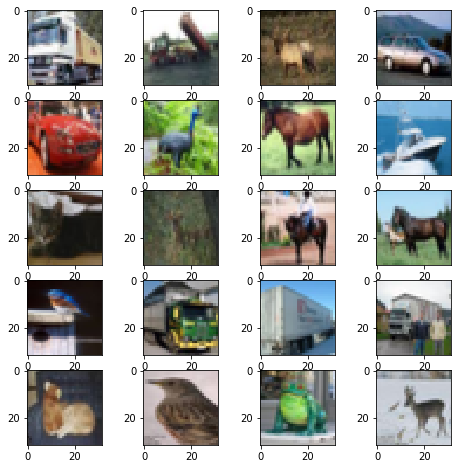

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Class  0 : airplane


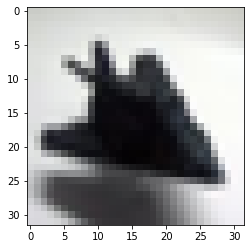

airplane  in train data:  5000 / 50000
airplane  in test data:  1000 / 10000


Class  1 : automobile


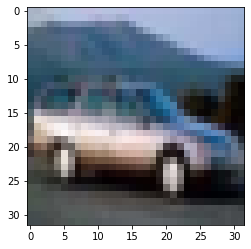

automobile  in train data:  5000 / 50000
automobile  in test data:  1000 / 10000


Class  2 : bird


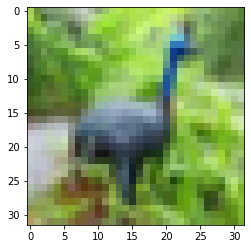

bird  in train data:  5000 / 50000
bird  in test data:  1000 / 10000


Class  3 : cat


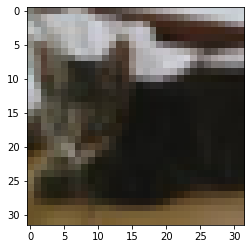

cat  in train data:  5000 / 50000
cat  in test data:  1000 / 10000


Class  4 : deer


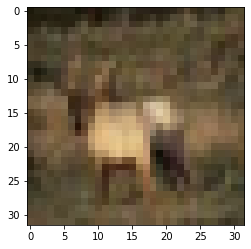

deer  in train data:  5000 / 50000
deer  in test data:  1000 / 10000


Class  5 : dog


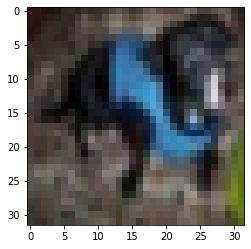

dog  in train data:  5000 / 50000
dog  in test data:  1000 / 10000


Class  6 : frog


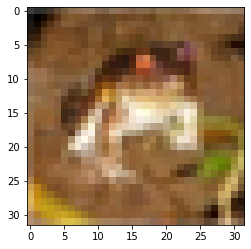

frog  in train data:  5000 / 50000
frog  in test data:  1000 / 10000


Class  7 : horse


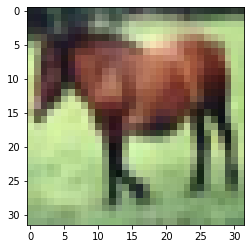

horse  in train data:  5000 / 50000
horse  in test data:  1000 / 10000


Class  8 : ship


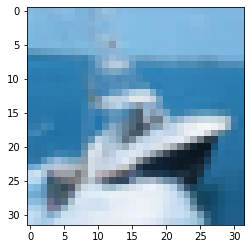

ship  in train data:  5000 / 50000
ship  in test data:  1000 / 10000


Class  9 : truck


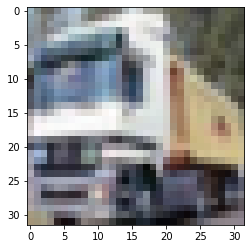

truck  in train data:  5000 / 50000
truck  in test data:  1000 / 10000




In [31]:
class_names, train_images, train_label, test_images, test_label = getDataset()

plot_sample(class_names, train_images, train_label)

print(train_images.shape, train_label.shape, test_images.shape, test_label.shape)

describe_dataset((class_names, train_images, train_label, test_images, test_label))

CALLBAKS

In [8]:
%load_ext tensorboard
log = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log, histogram_freq=1)

SIMPLE MULTILAYER

In [0]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(32, activation=relu))
    model.add(Dense(32, activation=relu))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                98336     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 99,722
Trainable params: 99,722
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
EPOCHS = 200
BATCH_SIZE=128

In [0]:
# formate data
train_images = train_images / 255
test_images = test_images / 255

In [0]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/simple/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 100us/sample - loss: 1.9814 - sparse_categorical_accuracy: 0.2751 - val_loss: 1.8583 - val_sparse_categorical_accuracy: 0.3315
Epoch 2/200
50000/50000 [==============================] - 3s 51us/sample - loss: 1.8454 - sparse_categorical_accuracy: 0.3336 - val_loss: 1.8181 - val_sparse_categorical_accuracy: 0.3467
Epoch 3/200
50000/50000 [==============================] - 3s 52us/sample - loss: 1.8095 - sparse_categorical_accuracy: 0.3457 - val_loss: 1.7894 - val_sparse_categorical_accuracy: 0.3610
Epoch 4/200
50000/50000 [==============================] - 3s 54us/sample - loss: 1.7876 - sparse_categorical_accuracy: 0.3529 - val_loss: 1.7922 - val_sparse_categorical_accuracy: 0.3497
Epoch 5/200
50000/50000 [==============================] - 3s 51us/sample - loss: 1.7670 - sparse_categorical_accuracy: 0.3598 - val_loss: 1.8065 - val_sparse_categorical_accuracy: 0.3515
Epoch 6/2

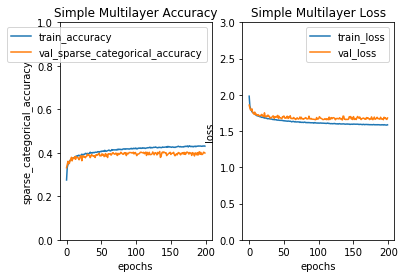

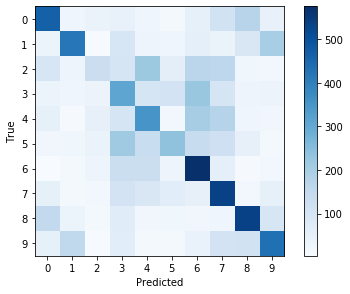

In [0]:
# evaluation
history_model(history.history, "Simple Multilayer")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

NEURAL AUGMENTATION

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [0]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu))
    model.add(Dense(64, activation=relu))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
EPOCHS = 200
BATCH_SIZE=128

In [0]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/neural_augm/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 3s 55us/sample - loss: 1.9280 - sparse_categorical_accuracy: 0.3045 - val_loss: 1.7871 - val_sparse_categorical_accuracy: 0.3554
Epoch 2/200
50000/50000 [==============================] - 3s 51us/sample - loss: 1.7671 - sparse_categorical_accuracy: 0.3703 - val_loss: 1.7158 - val_sparse_categorical_accuracy: 0.3892
Epoch 3/200
50000/50000 [==============================] - 3s 54us/sample - loss: 1.7078 - sparse_categorical_accuracy: 0.3912 - val_loss: 1.6551 - val_sparse_categorical_accuracy: 0.4110
Epoch 4/200
50000/50000 [==============================] - 3s 52us/sample - loss: 1.6664 - sparse_categorical_accuracy: 0.4084 - val_loss: 1.6421 - val_sparse_categorical_accuracy: 0.4182
Epoch 5/200
50000/50000 [==============================] - 3s 52us/sample - loss: 1.6389 - sparse_categorical_accuracy: 0.4195 - val_loss: 1.6365 - val_sparse_categorical_accuracy: 0.4202
Epoch 6/20

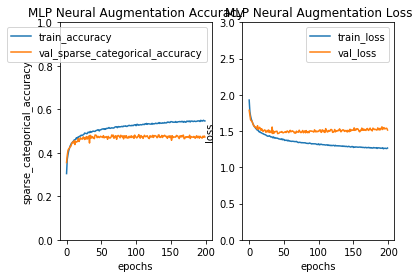

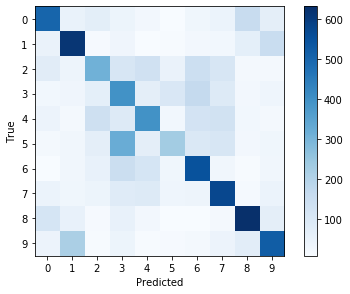

In [0]:
# evaluation
history_model(history.history, "MLP Neural Augmentation")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

LAYER AYGMENTATION

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [0]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu))
    model.add(Dense(64, activation=relu))
    model.add(Dense(64, activation=relu))
    model.add(Dense(64, activation=relu))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 209,802
Trainable params: 209,802
Non-trainable params: 0
________________________________________________

In [0]:
EPOCHS = 200
BATCH_SIZE=128

In [0]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/layer_augm/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 3s 60us/sample - loss: 1.9007 - sparse_categorical_accuracy: 0.3090 - val_loss: 1.7466 - val_sparse_categorical_accuracy: 0.3693
Epoch 2/200
50000/50000 [==============================] - 3s 52us/sample - loss: 1.7181 - sparse_categorical_accuracy: 0.3802 - val_loss: 1.6511 - val_sparse_categorical_accuracy: 0.4100
Epoch 3/200
50000/50000 [==============================] - 3s 54us/sample - loss: 1.6397 - sparse_categorical_accuracy: 0.4111 - val_loss: 1.5891 - val_sparse_categorical_accuracy: 0.4317
Epoch 4/200
50000/50000 [==============================] - 3s 53us/sample - loss: 1.5883 - sparse_categorical_accuracy: 0.4326 - val_loss: 1.5568 - val_sparse_categorical_accuracy: 0.4441
Epoch 5/200
50000/50000 [==============================] - 3s 54us/sample - loss: 1.5493 - sparse_categorical_accuracy: 0.4429 - val_loss: 1.5278 - val_sparse_categorical_accuracy: 0.4553
Epoch 6/20

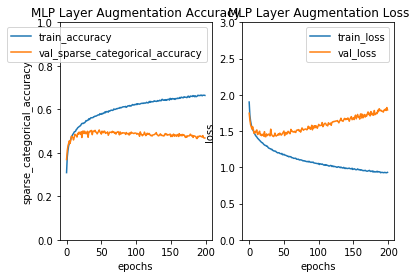

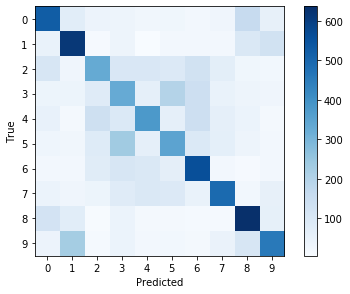

In [0]:
# evaluation
history_model(history.history, "MLP Layer Augmentation")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

ASCENDING DROPOUT

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [0]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.01))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.02))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.03))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.04))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                196672    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [0]:
EPOCHS = 200
BATCH_SIZE=128

In [0]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/dropout_asc/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 3s 55us/sample - loss: 1.9438 - sparse_categorical_accuracy: 0.2847 - val_loss: 1.7831 - val_sparse_categorical_accuracy: 0.3565
Epoch 2/200
50000/50000 [==============================] - 3s 50us/sample - loss: 1.7642 - sparse_categorical_accuracy: 0.3660 - val_loss: 1.7232 - val_sparse_categorical_accuracy: 0.3829
Epoch 3/200
50000/50000 [==============================] - 2s 46us/sample - loss: 1.6920 - sparse_categorical_accuracy: 0.3914 - val_loss: 1.6491 - val_sparse_categorical_accuracy: 0.4167
Epoch 4/200
50000/50000 [==============================] - 2s 45us/sample - loss: 1.6505 - sparse_categorical_accuracy: 0.4083 - val_loss: 1.5668 - val_sparse_categorical_accuracy: 0.4422
Epoch 5/200
50000/50000 [==============================] - 2s 44us/sample - loss: 1.6102 - sparse_categorical_accuracy: 0.4202 - val_loss: 1.6669 - val_sparse_categorical_accuracy: 0.3983
Epoch 6/20

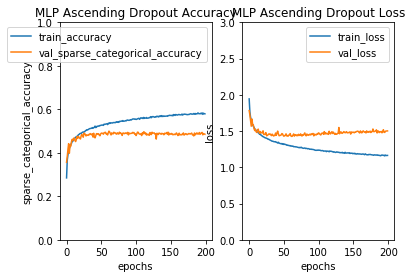

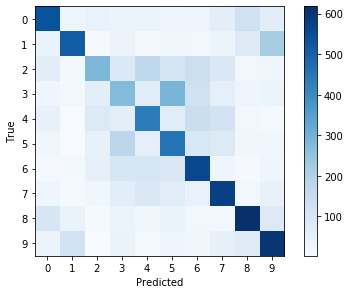

In [0]:
# evaluation
history_model(history.history, "MLP Ascending Dropout")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

DESCENDING DROPOUT

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [0]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.03))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.03))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.02))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.01))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                196672    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

In [0]:
EPOCHS = 200
BATCH_SIZE=128

In [0]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/dropout_desc/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 3s 66us/sample - loss: 1.9499 - sparse_categorical_accuracy: 0.2810 - val_loss: 1.7794 - val_sparse_categorical_accuracy: 0.3605
Epoch 2/200
50000/50000 [==============================] - 3s 54us/sample - loss: 1.7833 - sparse_categorical_accuracy: 0.3523 - val_loss: 1.6802 - val_sparse_categorical_accuracy: 0.3962
Epoch 3/200
50000/50000 [==============================] - 3s 56us/sample - loss: 1.7153 - sparse_categorical_accuracy: 0.3797 - val_loss: 1.7013 - val_sparse_categorical_accuracy: 0.3926
Epoch 4/200
50000/50000 [==============================] - 3s 52us/sample - loss: 1.6731 - sparse_categorical_accuracy: 0.3979 - val_loss: 1.6253 - val_sparse_categorical_accuracy: 0.4187
Epoch 5/200
50000/50000 [==============================] - 2s 48us/sample - loss: 1.6419 - sparse_categorical_accuracy: 0.4093 - val_loss: 1.6019 - val_sparse_categorical_accuracy: 0.4268
Epoch 6/20

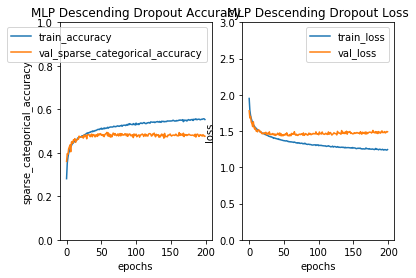

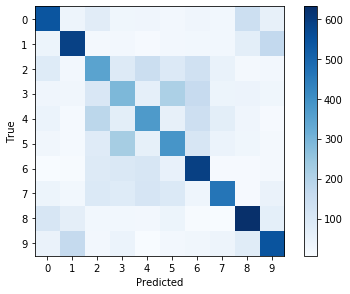

In [0]:
# evaluation
history_model(history.history, "MLP Descending Dropout")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

L2 REGULARIZER

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [0]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu, kernel_regularizer=keras.regularizers.l2(l=0.01)))
    model.add(Dense(64, activation=relu, kernel_regularizer=keras.regularizers.l2(l=0.01)))
    model.add(Dense(64, activation=relu, kernel_regularizer=keras.regularizers.l2(l=0.01)))
    model.add(Dense(64, activation=relu, kernel_regularizer=keras.regularizers.l2(l=0.01)))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 209,802
Trainable params: 209,802
Non-trainable params: 0
________________________________________________

In [0]:
EPOCHS = 200
BATCH_SIZE=128

In [0]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/reg_l2/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 3s 60us/sample - loss: 2.7106 - sparse_categorical_accuracy: 0.2834 - val_loss: 2.2360 - val_sparse_categorical_accuracy: 0.3051
Epoch 2/200
50000/50000 [==============================] - 3s 50us/sample - loss: 2.1175 - sparse_categorical_accuracy: 0.3358 - val_loss: 2.0498 - val_sparse_categorical_accuracy: 0.3448
Epoch 3/200
50000/50000 [==============================] - 2s 49us/sample - loss: 2.0362 - sparse_categorical_accuracy: 0.3464 - val_loss: 1.9812 - val_sparse_categorical_accuracy: 0.3605
Epoch 4/200
50000/50000 [==============================] - 2s 46us/sample - loss: 1.9996 - sparse_categorical_accuracy: 0.3505 - val_loss: 1.9640 - val_sparse_categorical_accuracy: 0.3610
Epoch 5/200
50000/50000 [==============================] - 2s 46us/sample - loss: 1.9725 - sparse_categorical_accuracy: 0.3548 - val_loss: 1.9763 - val_sparse_categorical_accuracy: 0.3570
Epoch 6/20

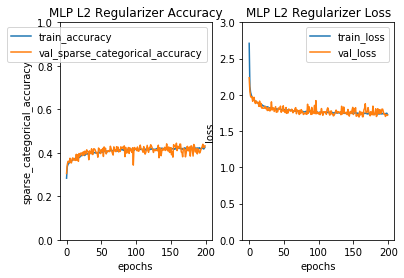

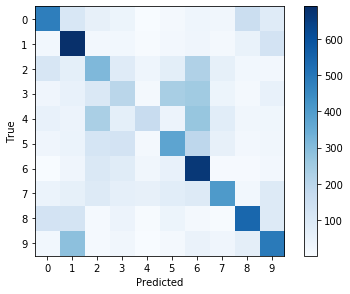

In [0]:
# evaluation
history_model(history.history, "MLP L2 Regularizer")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

L1L2 REGULARIZATION

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
#format data
train_images = train_images / 255
test_images = test_images / 255

In [0]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu, kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
    model.add(Dense(64, activation=relu, kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                650       
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
EPOCHS = 200
BATCH_SIZE=128

In [0]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/reg_l1l2/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 3s 54us/sample - loss: 5.4531 - sparse_categorical_accuracy: 0.1598 - val_loss: 2.4535 - val_sparse_categorical_accuracy: 0.1677
Epoch 2/200
50000/50000 [==============================] - 2s 44us/sample - loss: 2.4304 - sparse_categorical_accuracy: 0.1795 - val_loss: 2.4104 - val_sparse_categorical_accuracy: 0.1816
Epoch 3/200
50000/50000 [==============================] - 2s 45us/sample - loss: 2.4176 - sparse_categorical_accuracy: 0.1813 - val_loss: 2.3998 - val_sparse_categorical_accuracy: 0.1889
Epoch 4/200
50000/50000 [==============================] - 2s 46us/sample - loss: 2.4086 - sparse_categorical_accuracy: 0.1807 - val_loss: 2.4148 - val_sparse_categorical_accuracy: 0.1838
Epoch 5/200
50000/50000 [==============================] - 2s 47us/sample - loss: 2.4101 - sparse_categorical_accuracy: 0.1823 - val_loss: 2.3872 - val_sparse_categorical_accuracy: 0.1921
Epoch 6/20

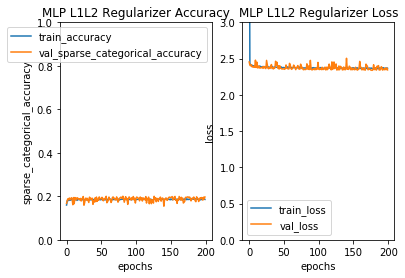

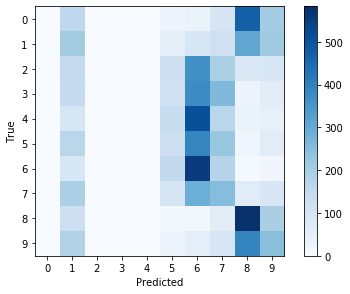

In [0]:
# evaluation
history_model(history.history, "MLP L1L2 Regularizer")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

DATA AUGMENTATION

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# set augmentation parameters
aug = keras.preprocessing.image.ImageDataGenerator(
  rotation_range=25,
  zoom_range=0.1,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  horizontal_flip=True,
  fill_mode="nearest")

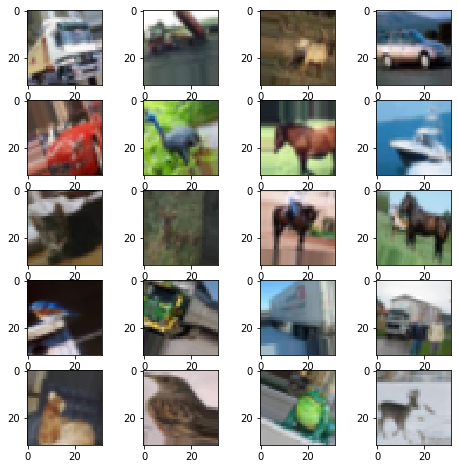

In [0]:
plot_sample(class_names, train_images, train_label, aug)

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [0]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu))
    model.add(Dense(64, activation=relu))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                650       
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
EPOCHS = 200
BATCH_SIZE=128

In [0]:
history = model.fit_generator(
	aug.flow(train_images, train_label, batch_size=BATCH_SIZE),
	validation_data=(test_images, test_label),
	epochs=EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 391 steps, validate on 10000 samples
Epoch 1/200
391/391 [==============================] - 25s 63ms/step - loss: 2.0311 - sparse_categorical_accuracy: 0.2545 - val_loss: 1.8710 - val_sparse_categorical_accuracy: 0.3258
Epoch 2/200
391/391 [==============================] - 23s 60ms/step - loss: 1.9125 - sparse_categorical_accuracy: 0.3069 - val_loss: 1.7934 - val_sparse_categorical_accuracy: 0.3531
Epoch 3/200
391/391 [==============================] - 24s 61ms/step - loss: 1.8730 - sparse_categorical_accuracy: 0.3233 - val_loss: 1.7806 - val_sparse_categorical_accuracy: 0.3569
Epoch 4/200
391/391 [==============================] - 25s 64ms/step - loss: 1.8380 - sparse_categorical_accuracy: 0.3372 - val_loss: 1.7065 - val_sparse_categorical_accuracy: 0.3947
Epoch 5/200
391/391 [==============================] - 25s 63ms/step - loss: 1.8098 - sparse_categorical_accuracy: 0.348

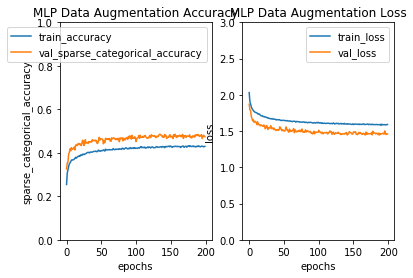

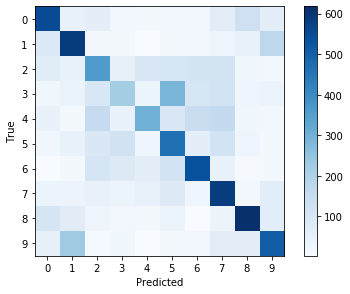

In [0]:
# evaluation
history_model(history.history, "MLP Data Augmentation")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

#### TRY TO DECREASE UNDERFITTING

In [20]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [21]:
# set augmentation parameters
aug = keras.preprocessing.image.ImageDataGenerator(
  rotation_range=25,
  zoom_range=0.1,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  horizontal_flip=True,
  fill_mode="nearest")

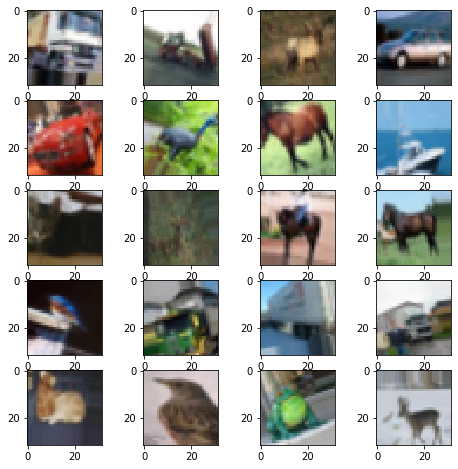

In [22]:
plot_sample(class_names, train_images, train_label, aug)

In [23]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [24]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation=relu))
    model.add(Dense(128, activation=relu))
    model.add(Dense(128, activation=relu))
    model.add(Dense(128, activation=relu))
    model.add(Dense(128, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
Total params: 459,392
Trainable params: 459,392
Non-trainable params: 0
________________________________________________

In [25]:
EPOCHS = 200
BATCH_SIZE = 128

In [26]:
history = model.fit_generator(
    aug.flow(train_images, train_label, batch_size=BATCH_SIZE),
    validation_data=(test_images, test_label),
    epochs=EPOCHS,
    callbacks=[tensorboard_callback])

model.save('saved_model/data_agment/')

Epoch 1/200
391/391 [==============================] - 46s 118ms/step - loss: 2.0918 - sparse_categorical_accuracy: 0.2416 - val_loss: 1.8322 - val_sparse_categorical_accuracy: 0.3325
Epoch 2/200
391/391 [==============================] - 39s 99ms/step - loss: 1.8989 - sparse_categorical_accuracy: 0.3075 - val_loss: 1.7503 - val_sparse_categorical_accuracy: 0.3633
Epoch 3/200
391/391 [==============================] - 39s 100ms/step - loss: 1.8371 - sparse_categorical_accuracy: 0.3351 - val_loss: 1.6775 - val_sparse_categorical_accuracy: 0.4048
Epoch 4/200
391/391 [==============================] - 39s 100ms/step - loss: 1.8012 - sparse_categorical_accuracy: 0.3488 - val_loss: 1.6387 - val_sparse_categorical_accuracy: 0.4073
Epoch 5/200
391/391 [==============================] - 39s 99ms/step - loss: 1.7664 - sparse_categorical_accuracy: 0.3631 - val_loss: 1.6233 - val_sparse_categorical_accuracy: 0.4140
Epoch 6/200
391/391 [==============================] - 49s 126ms/step - loss: 1.74

391/391 [==============================] - 41s 104ms/step - loss: 1.5223 - sparse_categorical_accuracy: 0.4502 - val_loss: 1.4667 - val_sparse_categorical_accuracy: 0.4757
Epoch 46/200
391/391 [==============================] - 47s 120ms/step - loss: 1.5242 - sparse_categorical_accuracy: 0.4541 - val_loss: 1.4099 - val_sparse_categorical_accuracy: 0.4961
Epoch 47/200
391/391 [==============================] - 46s 118ms/step - loss: 1.5264 - sparse_categorical_accuracy: 0.4509 - val_loss: 1.4221 - val_sparse_categorical_accuracy: 0.4944
Epoch 48/200
391/391 [==============================] - 39s 101ms/step - loss: 1.5205 - sparse_categorical_accuracy: 0.4510 - val_loss: 1.4129 - val_sparse_categorical_accuracy: 0.4956
Epoch 49/200
391/391 [==============================] - 39s 100ms/step - loss: 1.5177 - sparse_categorical_accuracy: 0.4536 - val_loss: 1.4107 - val_sparse_categorical_accuracy: 0.4932
Epoch 50/200
391/391 [==============================] - 42s 107ms/step - loss: 1.5233 - 

391/391 [==============================] - 40s 102ms/step - loss: 1.4660 - sparse_categorical_accuracy: 0.4734 - val_loss: 1.3792 - val_sparse_categorical_accuracy: 0.5128
Epoch 90/200
391/391 [==============================] - 41s 106ms/step - loss: 1.4526 - sparse_categorical_accuracy: 0.4765 - val_loss: 1.3756 - val_sparse_categorical_accuracy: 0.5160
Epoch 91/200
391/391 [==============================] - 46s 117ms/step - loss: 1.4549 - sparse_categorical_accuracy: 0.4765 - val_loss: 1.3702 - val_sparse_categorical_accuracy: 0.5135
Epoch 92/200
391/391 [==============================] - 39s 100ms/step - loss: 1.4575 - sparse_categorical_accuracy: 0.4760 - val_loss: 1.3662 - val_sparse_categorical_accuracy: 0.5165
Epoch 93/200
391/391 [==============================] - 39s 101ms/step - loss: 1.4534 - sparse_categorical_accuracy: 0.4755 - val_loss: 1.3906 - val_sparse_categorical_accuracy: 0.5040
Epoch 94/200
391/391 [==============================] - 40s 102ms/step - loss: 1.4633 - 

391/391 [==============================] - 42s 107ms/step - loss: 1.4142 - sparse_categorical_accuracy: 0.4931 - val_loss: 1.3681 - val_sparse_categorical_accuracy: 0.5167
Epoch 134/200
391/391 [==============================] - 49s 124ms/step - loss: 1.4249 - sparse_categorical_accuracy: 0.4873 - val_loss: 1.3618 - val_sparse_categorical_accuracy: 0.5165
Epoch 135/200
391/391 [==============================] - 42s 106ms/step - loss: 1.4241 - sparse_categorical_accuracy: 0.4854 - val_loss: 1.3551 - val_sparse_categorical_accuracy: 0.5227
Epoch 136/200
391/391 [==============================] - 41s 104ms/step - loss: 1.4211 - sparse_categorical_accuracy: 0.4878 - val_loss: 1.3392 - val_sparse_categorical_accuracy: 0.5229
Epoch 137/200
391/391 [==============================] - 49s 126ms/step - loss: 1.4209 - sparse_categorical_accuracy: 0.4872 - val_loss: 1.3571 - val_sparse_categorical_accuracy: 0.5160
Epoch 138/200
391/391 [==============================] - 44s 112ms/step - loss: 1.41

391/391 [==============================] - 43s 110ms/step - loss: 1.3971 - sparse_categorical_accuracy: 0.4996 - val_loss: 1.3770 - val_sparse_categorical_accuracy: 0.5146
Epoch 178/200
391/391 [==============================] - 43s 110ms/step - loss: 1.4028 - sparse_categorical_accuracy: 0.4943 - val_loss: 1.3502 - val_sparse_categorical_accuracy: 0.5190
Epoch 179/200
391/391 [==============================] - 49s 126ms/step - loss: 1.3975 - sparse_categorical_accuracy: 0.4991 - val_loss: 1.3489 - val_sparse_categorical_accuracy: 0.5240
Epoch 180/200
391/391 [==============================] - 44s 112ms/step - loss: 1.3976 - sparse_categorical_accuracy: 0.4980 - val_loss: 1.3463 - val_sparse_categorical_accuracy: 0.5262
Epoch 181/200
391/391 [==============================] - 40s 103ms/step - loss: 1.3965 - sparse_categorical_accuracy: 0.4978 - val_loss: 1.3513 - val_sparse_categorical_accuracy: 0.5238
Epoch 182/200
391/391 [==============================] - 40s 102ms/step - loss: 1.39

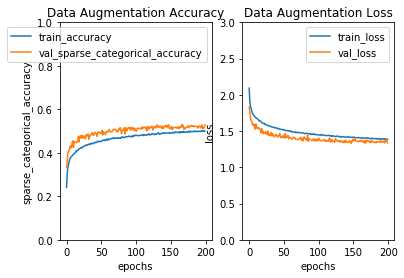

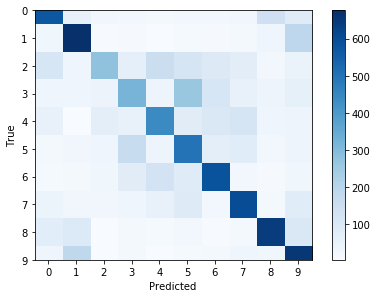

In [27]:
# evaluation
history_model(history.history, "Data Augmentation")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

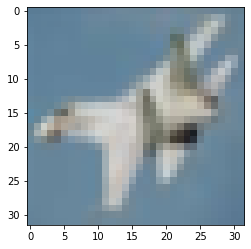

sample: airplane precition: ship


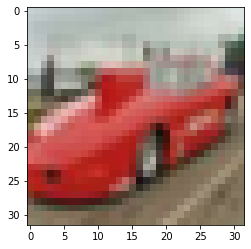

sample: automobile precition: truck


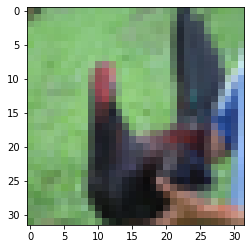

sample: bird precition: deer


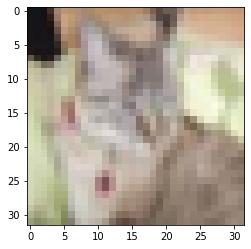

sample: cat precition: dog


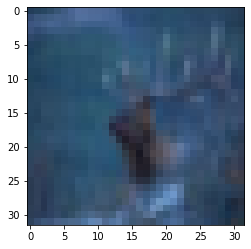

sample: deer precition: airplane


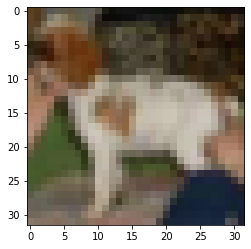

sample: dog precition: frog


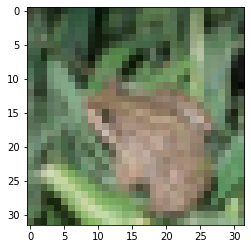

sample: frog precition: deer


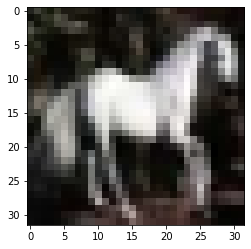

sample: horse precition: automobile


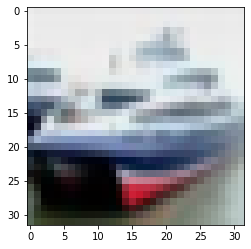

sample: ship precition: automobile


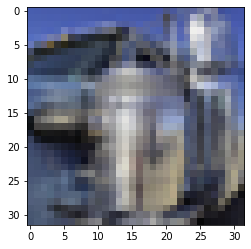

sample: truck precition: ship


In [28]:
plot_error(class_names, model, test_images, test_label)

In [29]:
%tensorboard --logdir logs/fit